In [39]:
import re
import pandas as pd
from io import StringIO

with open('float80-out7.txt', 'r') as file:
    file_content = file.read()

match = re.match(r'^[\w\W]*?\n( +PID.*COMMAND)\n([\w\W]*)', file_content )

header = match[1]
data = match[2]

In [40]:
lines = file_content.split('\n')
filtered_lines = [line for line in lines if re.match(r'^\s*\d', line)]

result = '\n'.join(filtered_lines)

In [41]:
data = result

In [42]:
data

'   3494 anna      20   0   64232   2404   1664 R  93,3   0,1   0:04.68 stress-+\n   3495 anna      20   0   64232   2404   1664 R  93,3   0,1   0:04.64 stress-+\n   3493 anna      20   0   64232   2404   1664 R  86,7   0,1   0:04.69 stress-+\n   3496 anna      20   0   64232   2404   1664 R  80,0   0,1   0:04.74 stress-+\n   3497 anna      20   0   64232   2404   1664 R  80,0   0,1   0:04.78 stress-+\n   3498 anna      20   0   64232   2404   1664 R  80,0   0,1   0:04.61 stress-+\n   3499 anna      20   0   64232   2276   1536 R  80,0   0,1   0:04.46 stress-+\n   3495 anna      20   0   64232   2404   1664 R  94,0   0,1   0:05.58 stress-+\n   3496 anna      20   0   64232   2404   1664 R  90,0   0,1   0:05.64 stress-+\n   3499 anna      20   0   64232   2276   1536 R  87,0   0,1   0:05.33 stress-+\n   3493 anna      20   0   64232   2404   1664 R  85,0   0,1   0:05.54 stress-+\n   3498 anna      20   0   64232   2404   1664 R  84,0   0,1   0:05.45 stress-+\n   3497 anna      20   0   

In [43]:
df = pd.read_fwf( StringIO(data)
        , colspecs = [(0,7), (49,54), (57,62), (63,70)]
        , names    = ['PID', '%CPU',  '%MEM', 'TIME+']
    )

In [44]:
df['%CPU'] = df['%CPU'].str.replace(',', '.')

In [45]:
df['%CPU'] = df['%CPU'].astype(float)

In [46]:
df

,PID,%CPU,%MEM,TIME+
0,3494,93.3,"0,1",0:04.68
1,3495,93.3,"0,1",0:04.64
2,3493,86.7,"0,1",0:04.69
3,3496,80.0,"0,1",0:04.74
4,3497,80.0,"0,1",0:04.78
...,...,...,...,...
135,3496,86.0,"0,1",0:22.04
136,3499,85.0,"0,1",0:21.94
137,3495,83.0,"0,1",0:22.12
138,3498,73.0,"0,1",0:21.04


In [47]:
lines = file_content.split('\n')
filtered_lines = [line for line in lines if re.match(r'^top', line)]

result = '\n'.join(filtered_lines)

In [48]:
times = re.findall(r'top - (\d{2}):(\d{2}):(\d{2}) up', result)

time = [(int(h) * 3600 + int(m) * 60 + int(s)) for h, m, s in times]

start_time = time[0]
time = [t - start_time for t in time]

[93.3, 75.0, 77.0, 95.0, 94.1, 77.0, 83.0, 94.0, 90.1, 95.0, 99.0, 95.0, 94.0, 95.0, 98.0, 96.0, 95.0, 87.0, 78.2, 86.0]
[93.3, 94.0, 81.0, 77.0, 83.2, 87.0, 93.0, 91.0, 97.0, 98.0, 99.0, 98.0, 100.0, 97.0, 94.0, 95.0, 91.0, 99.0, 87.1, 83.0]
[86.7, 85.0, 67.0, 81.0, 92.1, 50.0, 68.0, 87.0, 94.1, 98.0, 100.0, 96.0, 99.0, 97.0, 88.0, 93.0, 85.0, 92.0, 60.4, 70.0]
[80.0, 90.0, 72.0, 82.0, 93.1, 76.0, 84.0, 87.0, 99.0, 98.0, 100.0, 99.0, 99.0, 93.1, 91.0, 99.0, 94.0, 96.0, 88.1, 86.0]
[80.0, 83.0, 88.0, 87.0, 80.2, 78.0, 65.0, 71.0, 86.1, 95.0, 95.0, 98.0, 97.0, 86.1, 97.0, 84.0, 97.0, 82.0, 69.3, 93.0]
[80.0, 84.0, 81.0, 86.0, 86.1, 84.0, 58.0, 77.0, 97.0, 95.0, 94.0, 92.0, 96.0, 87.1, 98.0, 92.0, 98.0, 91.0, 70.3, 73.0]
[80.0, 87.0, 94.0, 77.0, 85.1, 80.0, 89.0, 95.0, 89.1, 94.0, 100.0, 100.0, 98.0, 92.1, 98.0, 99.0, 92.0, 99.0, 91.1, 85.0]


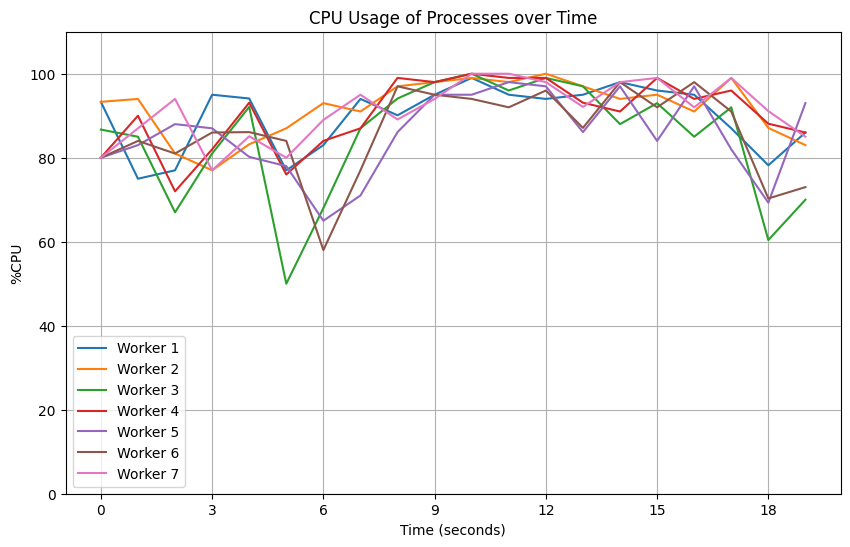

In [49]:
import matplotlib.pyplot as plt

unique_pids = df['PID'].unique()
pid_to_worker = {pid: index for index, pid in enumerate(unique_pids)}

cpu_data = {worker_num: [] for worker_num in pid_to_worker.values()}

for index, row in df.iterrows():
    worker_num = pid_to_worker[row['PID']]
    cpu_data[worker_num].append(row['%CPU'])

plt.figure(figsize=(10, 6))
for worker_num, cpu_values in cpu_data.items():
    print(cpu_values)
    plt.plot(time[:len(cpu_values)], cpu_values, label=f'Worker {worker_num + 1}')

plt.xlabel('Time (seconds)')
plt.ylabel('%CPU')
plt.title('CPU Usage of Processes over Time')
plt.legend()
plt.grid(True)

plt.ylim(0, 110)

plt.xticks(range(0, max(time), 3))

plt.show()
